In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('results.csv')

display(df)

,id,path,loudness,bpm,key_temperley,scale_temperley,key_krumhansl,scale_krumhansl,key_edma,scale_edma,discogs_embeddings_mean,style,instrumental,danceability,musicnn_embeddings_mean,valence,arousal,analyzed
0,1BcsepIH934g3mEXa1Mjol,./MusAV/audio_chunks/audio.006/1B/1BcsepIH934g...,-9.993112,106.704704,E,major,C#,minor,F#,minor,"[0.023470032960176468, -0.016608290374279022, ...",Funk / Soul---Soul,voice,danceable,"[2.022001266479492, -1.024600625038147, 1.2055...",6.142587,5.604628,True
1,1BqJIsOlo8rpm6FJ5N8VtJ,./MusAV/audio_chunks/audio.006/1B/1BqJIsOlo8rp...,-7.167593,109.826057,Eb,major,Eb,major,Eb,major,"[-0.020209694281220436, 0.09856818616390228, -...",Rock---Punk,voice,danceable,"[-4.04056978225708, 2.025223731994629, 3.46356...",5.017356,6.523270,True
2,1b3DCnwkxeL75NdjEY7shK,./MusAV/audio_chunks/audio.006/1b/1b3DCnwkxeL7...,-10.772586,120.842896,C,major,C,major,C,major,"[-0.008662045001983643, 0.09027078747749329, -...",Funk / Soul---Neo Soul,voice,danceable,"[2.3381237983703613, -1.210849404335022, -1.45...",4.559931,5.200700,True
3,6x1pp1GT6mZOG24G9fp90g,./MusAV/audio_chunks/audio.006/6x/6x1pp1GT6mZO...,-8.866240,128.805344,C,major,C,major,C,major,"[0.020039027556777, 0.016377883031964302, -0.0...",Electronic---Synth-pop,voice,danceable,"[-2.2124128341674805, -4.910097599029541, 0.90...",5.503736,5.459481,True
4,0OQpNjKRWIuHwsw1pHb397,./MusAV/audio_chunks/audio.006/0O/0OQpNjKRWIuH...,-12.369802,155.990982,Bb,major,D,minor,G,minor,"[0.18765583634376526, -0.018429886549711227, -...",Hip Hop---Cloud Rap,voice,danceable,"[0.2637907862663269, -3.5549304485321045, -3.4...",4.271087,4.237554,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,4aRMII6YJ2CBdnCMcglEnM,./MusAV/audio_chunks/audio.000/4a/4aRMII6YJ2CB...,-19.051960,117.453850,D,minor,D,minor,D,minor,"[-0.03000294417142868, 0.13963061571121216, -0...","Folk, World, & Country---Indian Classical",instrumental,not_danceable,"[-1.1952134370803833, -2.5250399112701416, -1....",5.222383,4.438677,True
2096,3LUPz3adlCwLL1Yl2IUHqL,./MusAV/audio_chunks/audio.000/3L/3LUPz3adlCwL...,-6.047090,96.762245,D,major,F#,minor,F#,minor,"[0.02539023943245411, 0.020924171432852745, -0...",Hip Hop---Grime,voice,danceable,"[3.450359582901001, -1.0078083276748657, -0.78...",4.375796,7.528498,True
2097,3L0Dg5V8V4XLugW7PXhKdk,./MusAV/audio_chunks/audio.000/3L/3L0Dg5V8V4XL...,-8.615831,128.523972,F,major,A,minor,D,minor,"[0.06571779400110245, 0.03368174657225609, 0.0...",Electronic---Tropical House,instrumental,danceable,"[0.46735039353370667, -1.8017112016677856, -2....",4.857923,5.191392,True
2098,6BgXXckMSkL9ogbNhhYZZf,./MusAV/audio_chunks/audio.000/6B/6BgXXckMSkL9...,-9.944283,103.197258,C#,minor,Ab,major,Ab,major,"[0.050828173756599426, -0.002834801096469164, ...",Rock---Death Metal,instrumental,danceable,"[-4.876864910125732, 4.081780433654785, -0.550...",1.366026,4.325165,True


## Genre distribution

As we can see from plot1 the dataset is not very balanced across genres, we have a lot of rock and electronic, very few pop blues and reggae entries compared to a billboards and such. So probably any model trained on this will be biased and have different performance across genres.

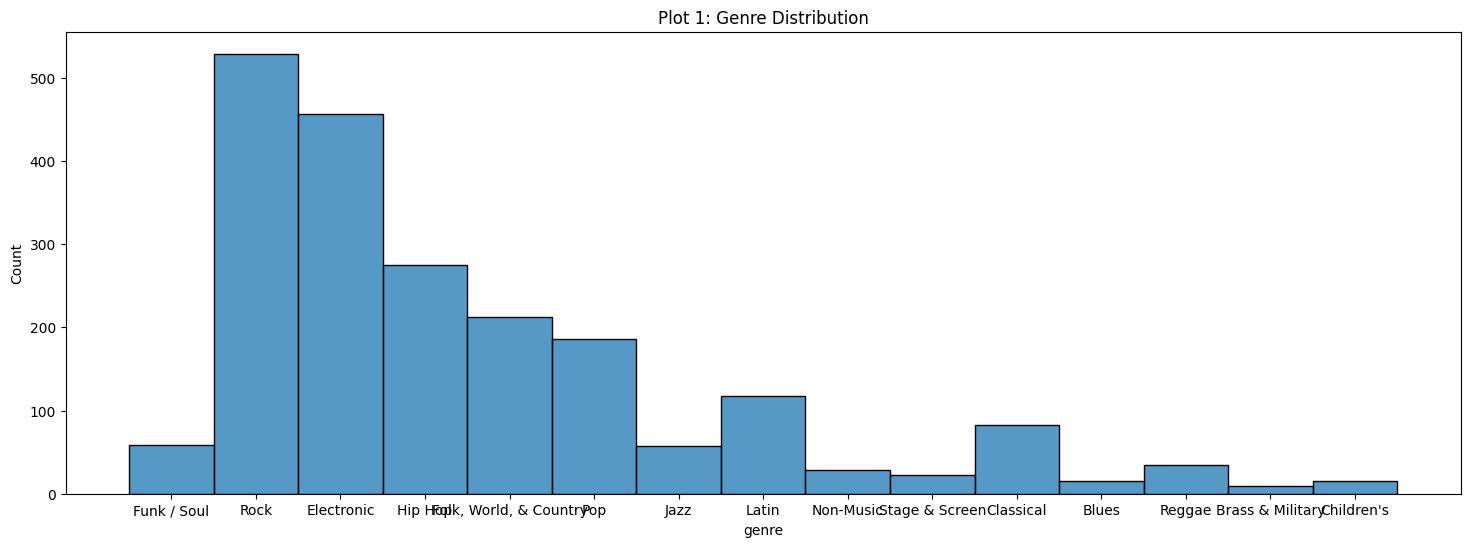

In [6]:
# plot "style" column distribution
# Split the style value on "---" and take the first part
df['genre'] = df['style'].apply(lambda x: x.split('---')[0])

plt.figure(figsize=(18, 6))
sns.histplot(df['genre'], kde=False)
plt.title('Plot 1: Genre Distribution')
plt.show()


## BPM distribution and danceability

BPM are mostly concentrated between 80 and 140, with a few outliers (Plot 2). In my experience this is quite realistic and reflects the distribution of popular music. Most of the songs are considered danceable (Plot 3), which is also quite realistic especially from the genres we have in the dataset. The presence of World and Jazz and Classical genres might be the reason for the lower danceability scores.


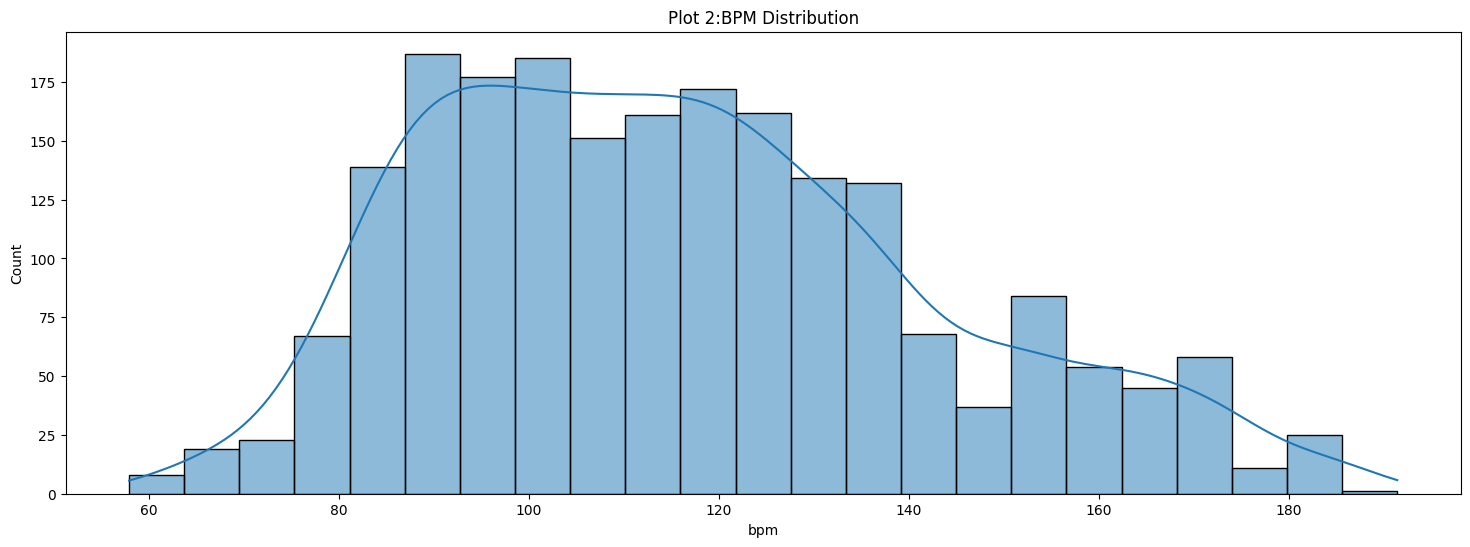

In [14]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6))

# Plot bpm column distribution
sns.histplot(df['bpm'], kde=True)

# Add title
plt.title('Plot 2:BPM Distribution')

# Show the plot
plt.show()

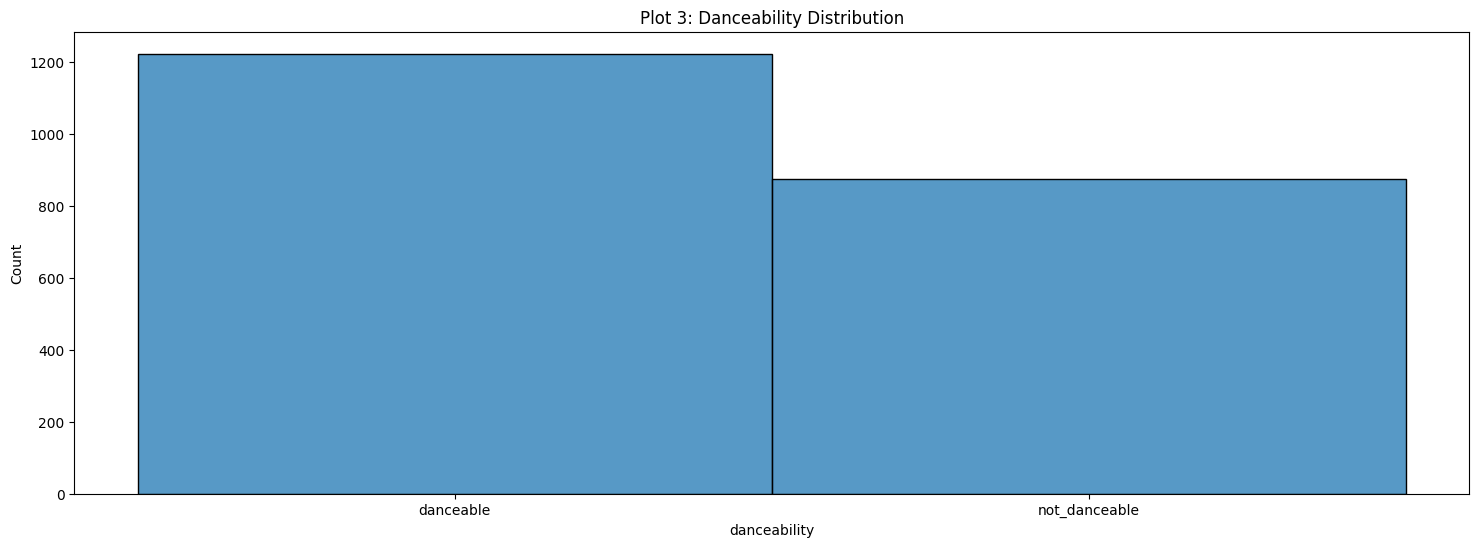

In [17]:
# plot danceability column distribution
plt.figure(figsize=(18, 6))
sns.histplot(df['danceability'], kde=False)
plt.title('Plot 3: Danceability Distribution')
plt.show()


## Keys and modes

The following plots (Plot 4a amd 4b) show the distribution of keys and modes in the dataset. The key distribution is quite uniform, C and G are the preferred major keys and A, D and E the preferred minor keys, which makes sense since are the simplest on most pupular instruments. The mode distribution is quite uniform, with a slight preference for major keys.

The three methods used only agree on 48.9% of the songs which is quite low. In particular temperley seems biased toward major keys, while edma towards minor keys. Krumhansl-Schmuckler seems to be the most balanced, but we are not comparing the results with the actual key of the songs, so we can't say which one is the best.

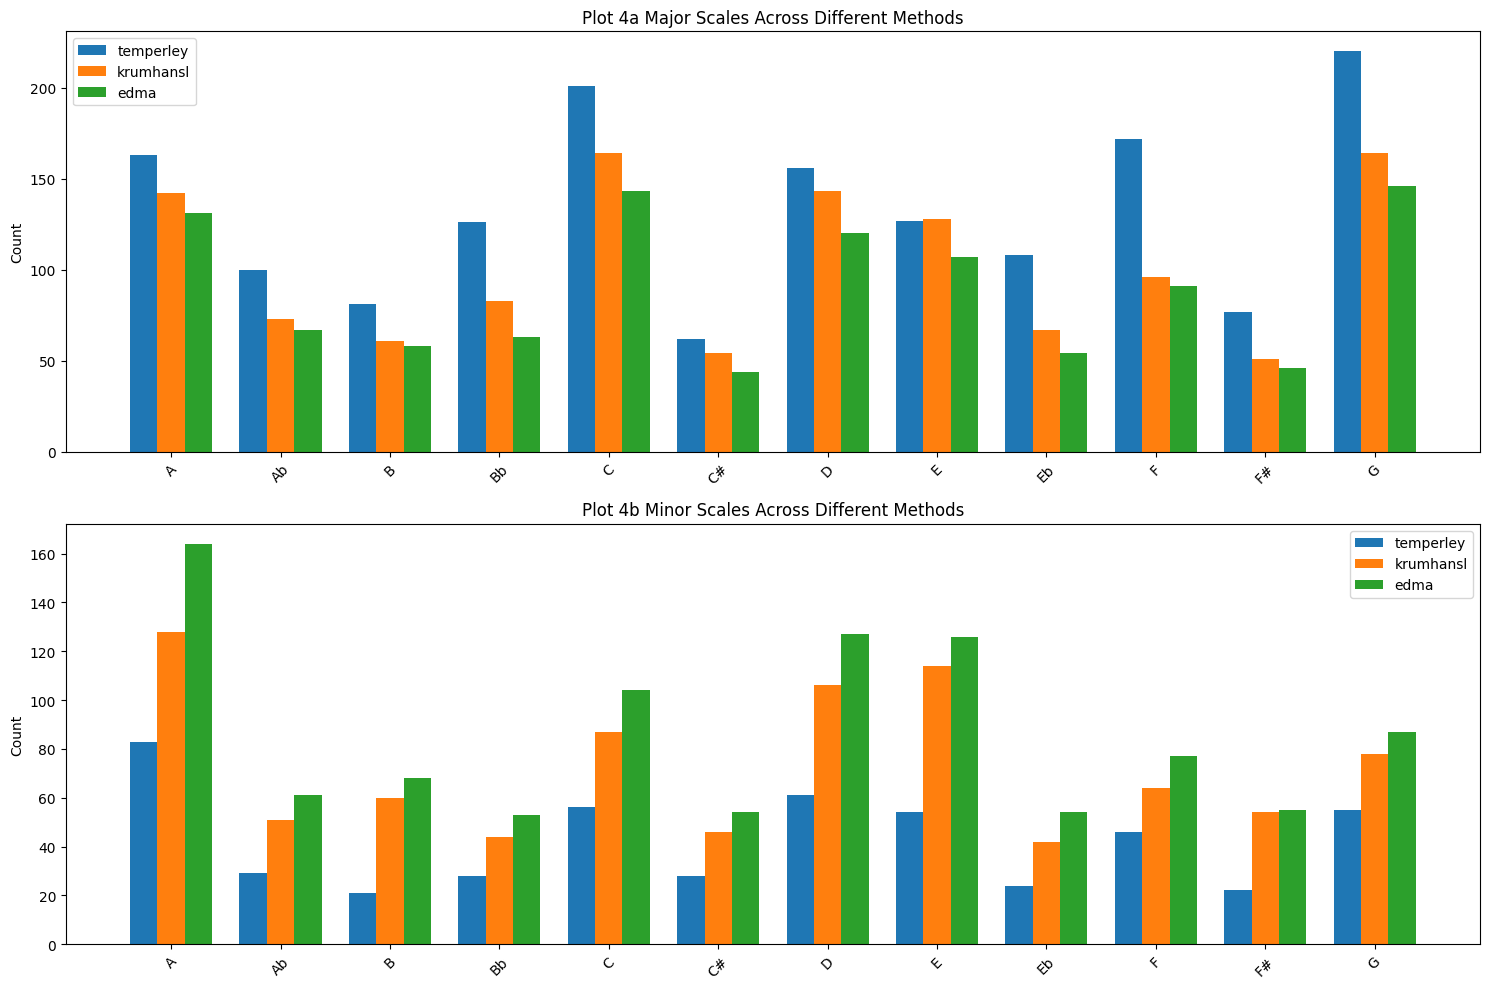

In [16]:
key_scale_df_temperley = df.groupby(['key_temperley', 'scale_temperley']).size().reset_index(name='count')
key_scale_df_krumhansl = df.groupby(['key_krumhansl', 'scale_krumhansl']).size().reset_index(name='count')
key_scale_df_edma = df.groupby(['key_edma', 'scale_edma']).size().reset_index(name='count')

# Setup data structure
methods = {
    'temperley': ['key_temperley', 'scale_temperley'],
    'krumhansl': ['key_krumhansl', 'scale_krumhansl'],
    'edma': ['key_edma', 'scale_edma']
}

# Create data structures for major and minor
major_data = {}
minor_data = {}

# Collect data for each method
for method, (key_col, scale_col) in methods.items():
    grouped = df.groupby([key_col, scale_col]).size().reset_index(name='count')
    major_data[method] = grouped[grouped[scale_col] == 'major'].set_index(key_col)['count']
    minor_data[method] = grouped[grouped[scale_col] == 'minor'].set_index(key_col)['count']

# Setup plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Get all unique keys
all_keys = sorted(set(df['key_temperley'].unique()) | 
                 set(df['key_krumhansl'].unique()) | 
                 set(df['key_edma'].unique()))

# Set width of bars and positions
width = 0.25
x = np.arange(len(all_keys))

# Plot major scales
for i, (method, data) in enumerate(major_data.items()):
    counts = [data.get(key, 0) for key in all_keys]
    ax1.bar(x + (i-1)*width, counts, width, label=method)

# Plot minor scales
for i, (method, data) in enumerate(minor_data.items()):
    counts = [data.get(key, 0) for key in all_keys]
    ax2.bar(x + (i-1)*width, counts, width, label=method)

# Customize plots
for ax, scale in [(ax1, 'a Major'), (ax2, 'b Minor')]:
    ax.set_ylabel('Count')
    ax.set_title(f'Plot 4{scale} Scales Across Different Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(all_keys, rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

In [10]:
# calculate percentage of songs aìon which all methods agree
all_agree = ((df['scale_temperley'] == df['scale_krumhansl']) & 
             (df['scale_krumhansl'] == df['scale_edma']) & 
             (df['key_temperley'] == df['key_krumhansl']) & 
             (df['key_krumhansl'] == df['key_edma']))

percentage_all_agree = all_agree.mean() * 100
print(f'Percentage of songs on which all methods agree: {percentage_all_agree:.2f}%')

Percentage of songs on which all methods agree: 48.90%


## Loudness

The loudness is centered at -9 LUFS which is almost on the lower side for popular music, but it's quite realistic. The distribution is quite uniform, with very few songs over -5 LUFS and a long tail of quieter songs, which makes sense for classical, jazz, ambient and other genres.

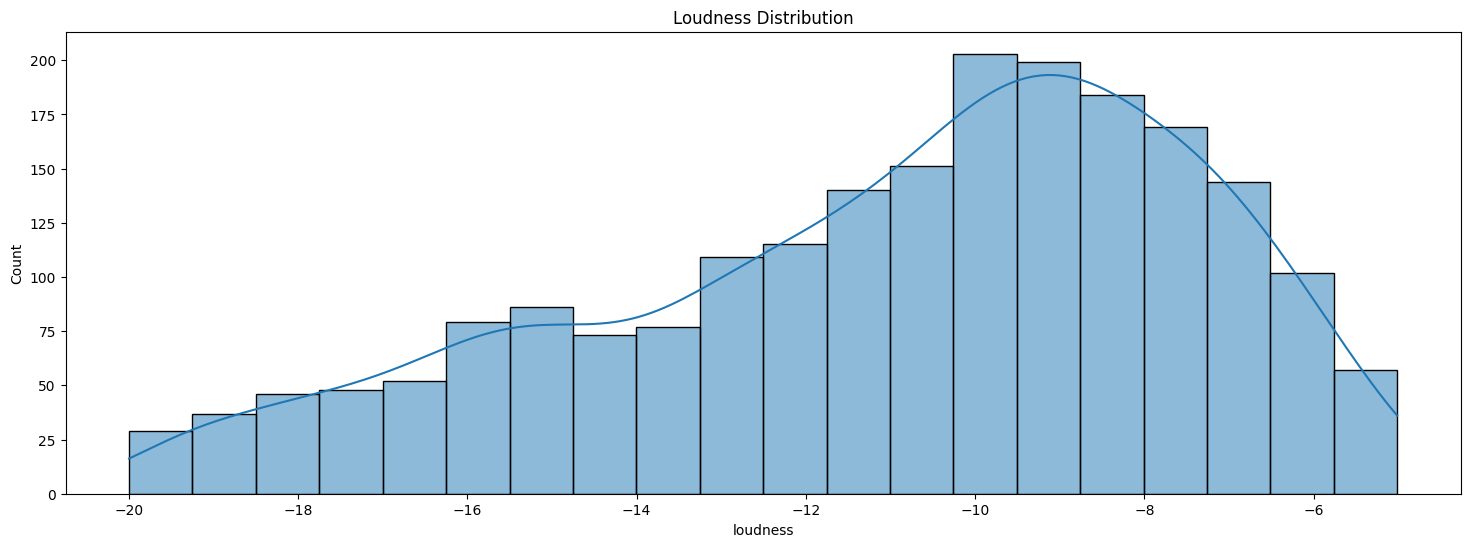

In [11]:
# plot loudness column distribution
plt.figure(figsize=(18, 6))
sns.histplot(df['loudness'], kde=True)
plt.title('Loudness Distribution')
plt.show()


## Arousal and Valence

The arousal and valence scatter plot is leaning towards higher values, this checks out with the genres we have in the dataset, which are mostly energetic like rock, electronic, pop and hip hop.

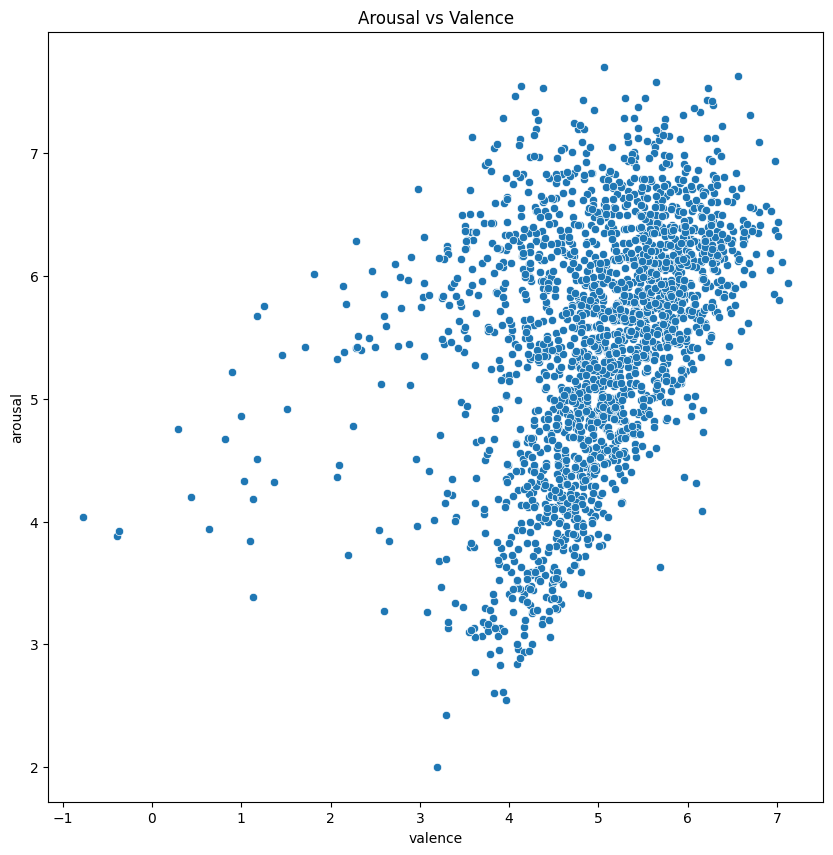

In [12]:
#plot arousal valence columns scatter plot

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='valence', y='arousal')
plt.title('Arousal vs Valence')
plt.show()


## Instrumental or vocal

The dataset is quite balanced between instrumental and vocal songs, which is quite realistic. The instrumental songs are mostly classical, jazz and ambient, while the vocal songs are mostly rock, pop, electronic and hip hop.

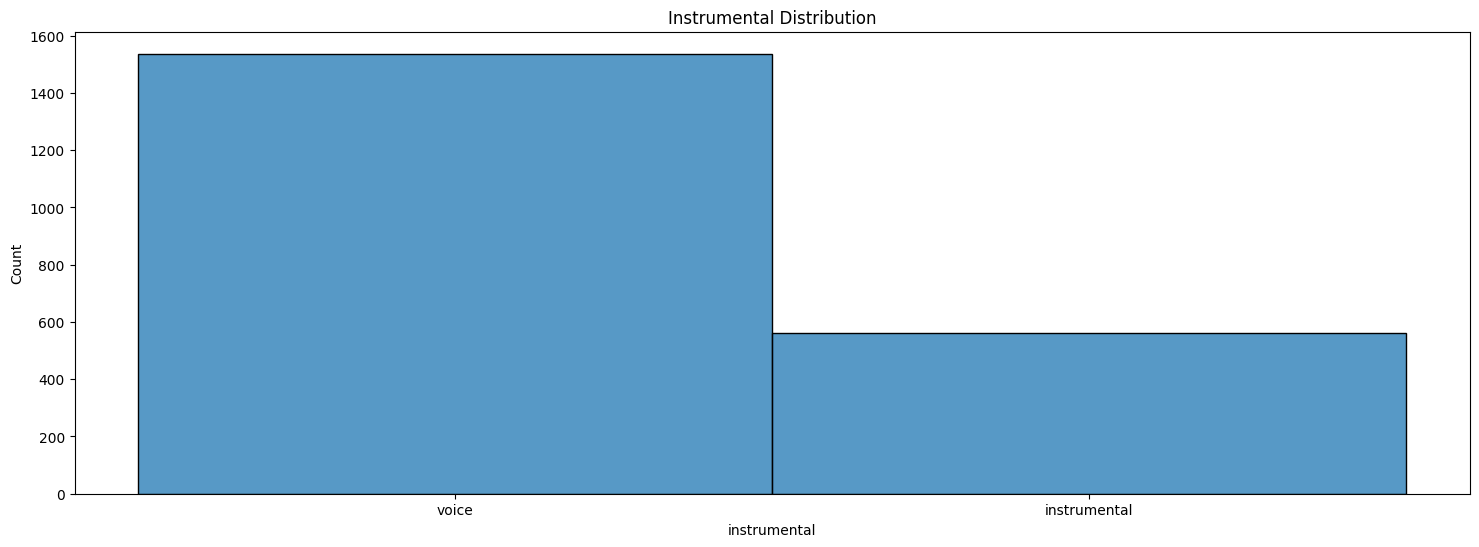

In [13]:
# plot instrumental column distribution
plt.figure(figsize=(18, 6))
sns.histplot(df['instrumental'], kde=False)
plt.title('Instrumental Distribution')
plt.show()
